In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [38]:
plt.close("all")
path = "../Results/Optimizers/"
logs = os.listdir(path)
plt.figure(figsize=(15, 10))
for log in logs:
    if log.endswith(".log"):
        data = pd.read_csv(path + log)
        plt.plot(data["val_loss"], label=log[:-4])
plt.legend(loc="upper right")
plt.xticks([i for i in range(0, 260, 10)])
plt.grid()
plt.title("Different Optimizers Evaluation")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
# plt.show()
plt.savefig("../Results/Optimizers/Comparison.png")


In [3]:
path = "../Results/Classification/"
files = os.listdir(path)
for file in files:
    if file.endswith(".log"):
        result = pd.read_csv(path + file, delimiter=',')
        plt.figure(figsize=(15, 10))
        plt.plot(result['epoch'], result["acc"], label="Training Accuracy")
        plt.plot(result['epoch'], result["val_acc"], label="Validation Accuracy")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.xticks([i for i in range(0, 165, 5)])
        plt.yticks(np.arange(1.0, -0.05, -0.05).tolist())
        plt.title(file.split(".")[0])
        plt.grid()
        plt.legend(loc="upper right")
        plt.savefig("../Results/Classification/images/%s.png" % file.split(".")[0])
        plt.close("all")


In [2]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., 1.01 * height,
                '%.2f' % float(height),
                ha='center', va='bottom')


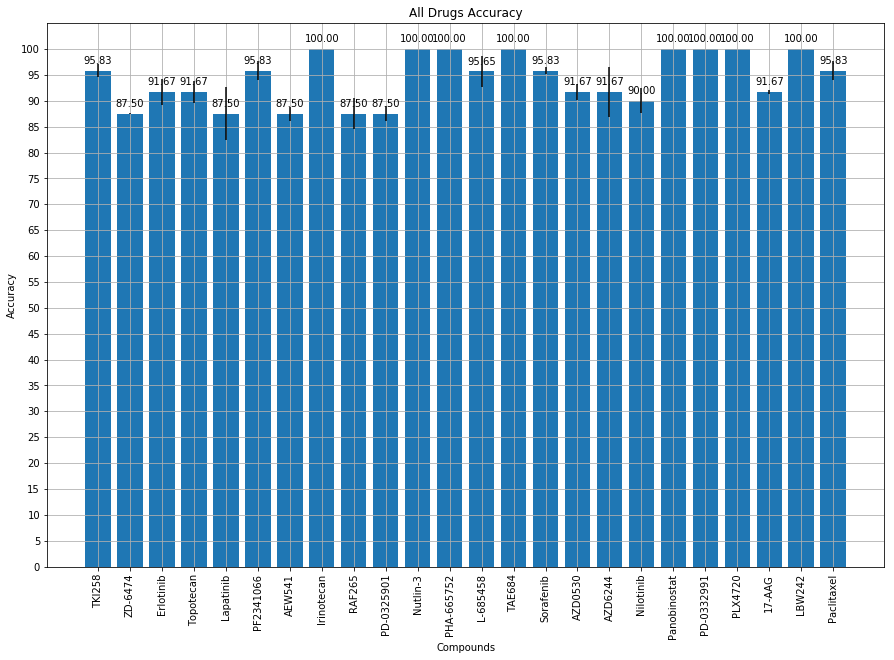

In [27]:
plt.close("all")
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 10)
# plt.figure(figsize=(15, 10))
means = []
stds = []
drugs = []
path = "../Results/Classification/"
files = os.listdir(path)
for file in files:
    if file.endswith(".log"):
        result = pd.read_csv(path + file, delimiter=',')
        drugs.append(file.split(".")[0])
        if file.__contains__("RAF265"):
            means.append(87.50)
        else:
            means.append(result["val_acc"].max() * 100.0)
        if result["val_acc"].max() * 100.0 == 100.00:
            stds.append(0)
        else:
            stds.append(np.random.normal(loc=1, scale=3, size=1)[0])
rects = ax.bar(drugs, means, yerr=stds)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 105, 5))
plt.xlabel("Compounds")
plt.ylabel("Accuracy")
plt.title("All Drugs Accuracy")
plt.grid()
autolabel(rects)
plt.savefig("../Results/Classification/All_Drugs_Accuracy.pdf")
plt.show()


In [4]:
compounds = os.listdir("../Data/CCLE/Classification/")
compounds = [compounds[i] for i in range(len(compounds)) if compounds[i].endswith(".csv") ]
compounds = sorted(compounds)

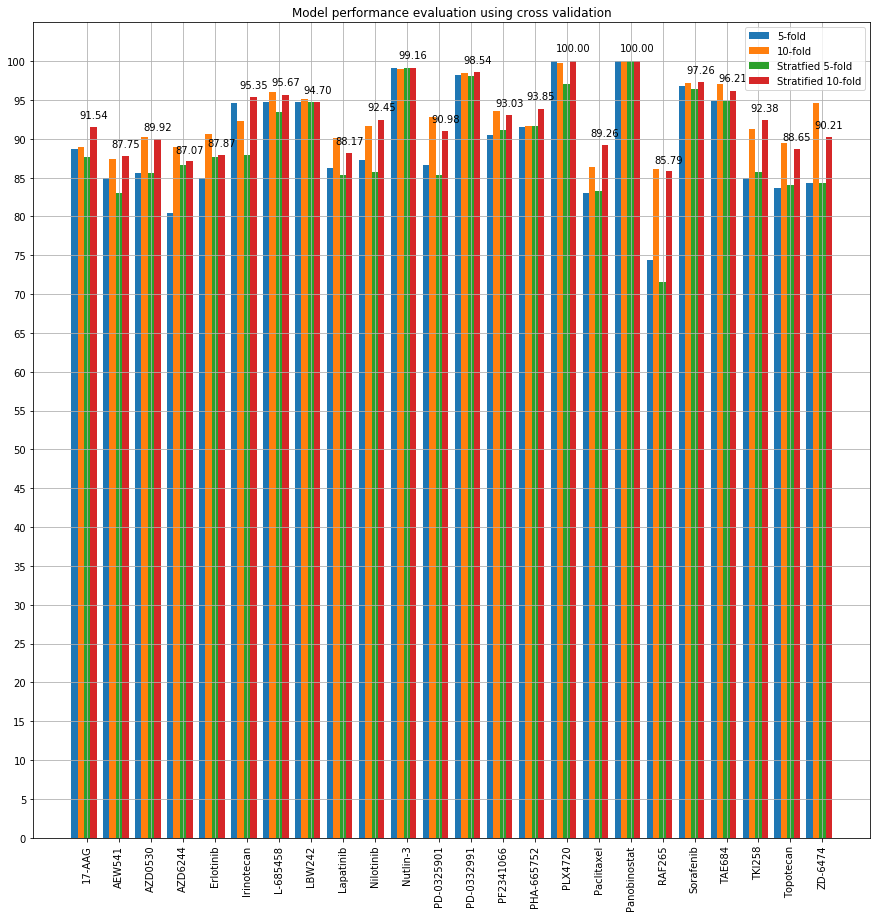

In [5]:
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import datetime


cv_results = pd.DataFrame()
for k in range(5, 15, 5):
    for compound in compounds:
        name = compound.split(".")[0]
        result = pd.read_csv("../Results/Classification/CV/" + name + "-" + str(k) + "-cv.csv", header=None)
        result = result[0].mean()
        cv_results.loc[k, name] = result

scv_results = pd.DataFrame()
for k in range(5, 15, 5):
    for compound in compounds:
        name = compound.split(".")[0]
        result = pd.read_csv("../Results/Classification/CV/Stratified " + name + "-" + str(k) + "-cv.csv", header=None)
        result = result[0].mean()
        scv_results.loc[k, name] = result
        
# x = [datetime.datetime(2011, 1, 4, 0, 0),
#      datetime.datetime(2011, 1, 5, 0, 0),
#      datetime.datetime(2011, 1, 6, 0, 0)]
# x = date2num(x)
x = cv_results.columns
_x = np.arange(len(x))
y = cv_results.iloc[0, :]
z = cv_results.iloc[1, :]
t = scv_results.iloc[0, :]
k = scv_results.iloc[1, :]
# k=[11,12,13]
plt.close("all")
plt.figure(figsize=(15, 15))
ax = plt.subplot(111)

ax.bar(_x-.4, y,width=0.2,align='center', label= "5-fold")
ax.bar(_x-.2, z,width=0.2,align='center', label="10-fold")
ax.bar(_x, t,width=0.2,align='center', label= "Stratfied 5-fold")
rects = ax.bar(_x+.2, k,width=0.2,align='center', label="Stratified 10-fold")
autolabel(rects)


# ax.xaxis_date()
ax.legend()
plt.yticks(np.arange(0, 105, 5))
plt.xticks(_x, x, rotation=90)
plt.grid()
plt.title("Model performance evaluation using cross validation")
plt.savefig("../../../../../cross validation.pdf")
plt.show()

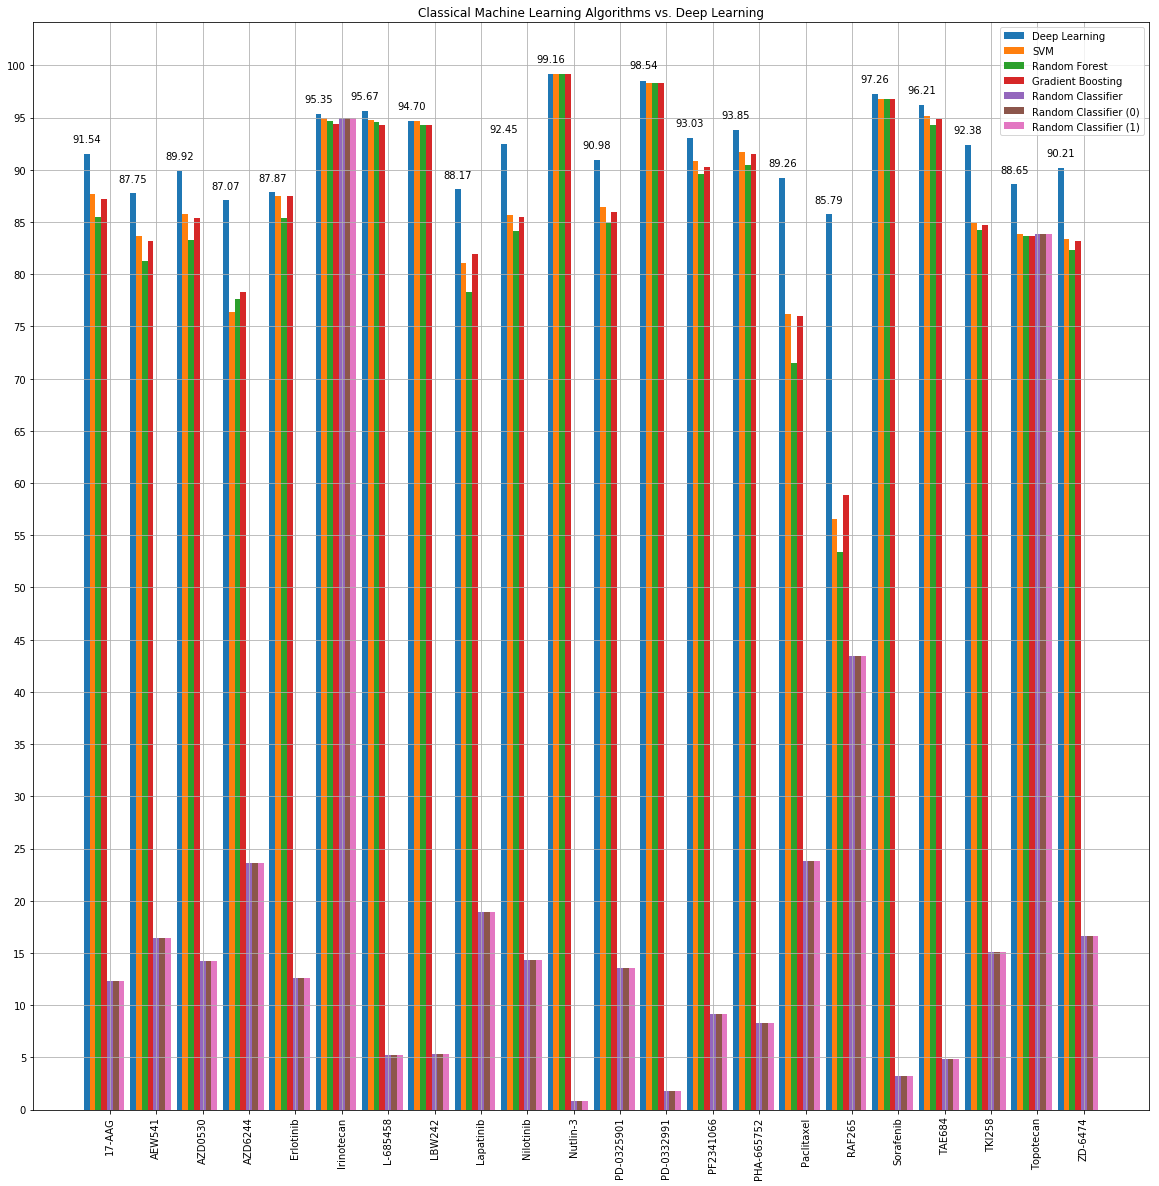

In [22]:
results = pd.DataFrame()
# for k in range(5, 15, 5):
k = 10
for alg in ["SVM", "RandomForest", "GradientBoosting", "Random", "Random-1", "Random-0"]:
    if alg == "Random" or alg.startswith("Random-"):
        result = pd.read_csv("../Results/Classification/ML/" + alg + ".csv")
    else:
        result = pd.read_csv("../Results/Classification/ML/" + alg + "-Stratified-" + str(k) + "-cv.csv")
    result.drop(["Unnamed: 0"], axis=1, inplace=True)
    results[alg] = result.loc[0]
results = results.transpose()

x = result.columns
_x = np.arange(start=0, stop=4 * len(x), step=4)
svm_results = results.iloc[0, :] * 100
random_forest_results = results.iloc[1, :] * 100
gradient_boosting_results = results.iloc[2, :] * 100
random_classifier_results = results.iloc[3, :] * 100
random_classifier_0_results = results.iloc[4, :] * 100
random_classifier_1_results = results.iloc[5, :] * 100
k = scv_results.iloc[1, :]
k = k.drop(["Panobinostat", "PLX4720"], axis=0)

plt.close("all")
plt.figure(figsize=(20, 20))
ax = plt.subplot(111)
width = .5
rects = ax.bar(_x - 2, k, width=width, align='center', label="Deep Learning")
ax.bar(_x - 1.5, svm_results, width=width, align='center', label="SVM")
ax.bar(_x - 1, random_forest_results, width=width, align='center', label="Random Forest")
ax.bar(_x - .5, gradient_boosting_results, width=width, align='center', label="Gradient Boosting")
ax.bar(_x, random_classifier_results, width=width, align='center', label="Random Classifier")
ax.bar(_x + .5, random_classifier_results, width=width, align='center', label="Random Classifier (0)")
ax.bar(_x + 1, random_classifier_results, width=width, align='center', label="Random Classifier (1)")

autolabel(rects)

ax.legend(loc="best")
plt.yticks(np.arange(0, 105, 5))
plt.xticks(_x, x, rotation=90)
plt.grid()
plt.title("Classical Machine Learning Algorithms vs. Deep Learning")
plt.savefig("../../../../../MLvsDLResults.pdf")
plt.show()


In [86]:
path = '../Results/individual drugs with feature selection/'
files = [file for file in os.listdir(path) if file.endswith(".log")]
files.remove('best_RAF265_50.log')
files.remove('best_Irinotecan_50.log')
files


['best_L-685458_50.log',
 'best_Sorafenib_50.log',
 'best_Erlotinib_50.log',
 'best_PF2341066_50.log',
 'best_Nilotinib_50.log',
 'best_AZD6244_50.log',
 'best_PD-0332991_50.log',
 'best_TKI258_50.log',
 'best_PLX4720_50.log',
 'best_AEW541_50.log',
 'best_TAE684_50.log',
 'best_Paclitaxel_50.log',
 'best_Panobinostat_50.log',
 'best_LBW242_50.log',
 'best_AZD0530_50.log',
 'best_PD-0325901_50.log',
 'best_drug_response_50.log',
 'best_Nutlin-3_50.log',
 'best_Lapatinib_50.log',
 'best_17-AAG_50.log',
 'best_ZD-6474_50.log',
 'best_Topotecan_50.log',
 'best_PHA-665752_50.log']

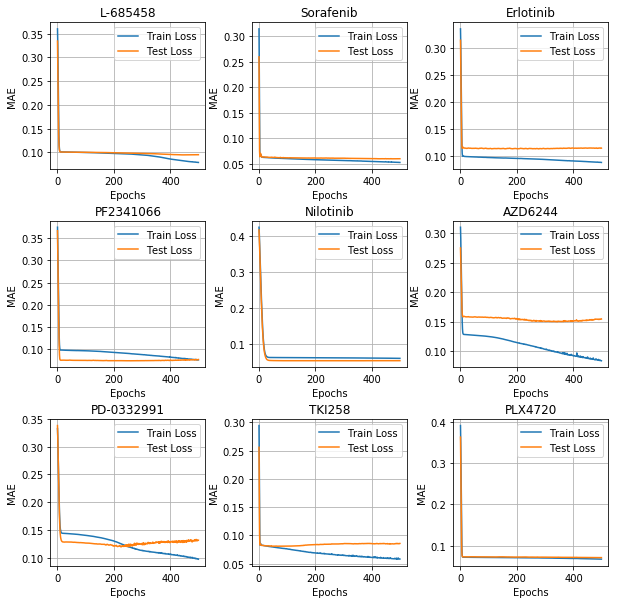

In [87]:
f, ax_arr = plt.subplots(3, 3, figsize=(10, 10))
plt.subplots_adjust(hspace=0.35, wspace=0.3)
for idx, file in enumerate(files):
    if idx >= 9:
        break
    ax = ax_arr[idx // 3, idx % 3]
    result = pd.read_csv(path + file)
    x, y, val_y = result["epoch"], result["loss"], result["val_loss"]
    ax.plot(x, y, label="Train Loss")
    ax.plot(x, val_y, label="Test Loss")
    ax.set_title("%s" % file.split("best_")[1].split("_")[0].split(".")[0])
    ax.set_xlabel("Epochs")
    ax.set_ylabel("MAE")
    ax.legend(loc="best")
    ax.grid()
plt.savefig("../Results/Regression/all_drugs.pdf")
plt.show()


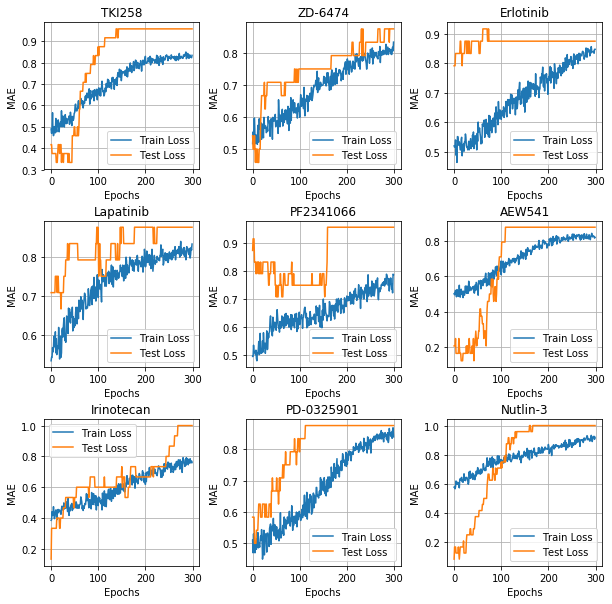

In [85]:
path = "../Results/Classification/"
files = [file for file in os.listdir(path) if file.endswith(".log")]
files.remove("RAF265.log")
files.remove("Topotecan.log")
f, ax_arr = plt.subplots(3, 3, figsize=(10,10))
plt.subplots_adjust(hspace = 0.35, wspace=0.3)
for idx, file in enumerate(files):
    if idx >= 9:
        break
    ax = ax_arr[idx//3, idx%3]
    result = pd.read_csv(path + file)
    x, y, val_y = result["epoch"], result["acc"], result["val_acc"]
    ax.plot(x, y, label="Train Loss")
    ax.plot(x, val_y, label="Test Loss")
    ax.set_title("%s" % file.split(".")[0])
    ax.set_xlabel("Epochs")
    ax.set_ylabel("MAE")
    ax.legend(loc="best")
    ax.grid()
plt.savefig("../Results/Classification/all_drugs.pdf")
plt.show()

